In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth

In [3]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM2
CanESM2_ens = xr.open_dataset(path2+'CanESM2/pr_Amon_CanESM2_historical_ensmean_197601-200512_2.5_mes.nc')

#Abro CanESM5
CanESM5_ens = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_historical_ensmean1p1f1_2.5_mes.nc')

In [4]:

#Monzón HS
def annual_range_HS(dato):
    verano = dato.sel(time=dato['time.season']=='DJF').mean(dim='time').pr
    invierno = dato.sel(time=dato['time.season']=='JJA').mean(dim='time').pr
    primavera = dato.sel(time=dato['time.season']=='SON').mean(dim='time').pr
    otono = dato.sel(time=dato['time.season']=='MAM').mean(dim='time').pr
    anual = verano + primavera + invierno + otono
    porcentaje_verano = verano/anual
    rango = (verano-invierno)*3
    return rango, porcentaje_verano

#Monzón HN
def annual_range_HN(dato):
    verano = dato.sel(time=dato['time.season']=='JJA').mean(dim='time').pr
    invierno = dato.sel(time=dato['time.season']=='DJF').mean(dim='time').pr
    primavera = dato.sel(time=dato['time.season']=='MAM').mean(dim='time').pr
    otono = dato.sel(time=dato['time.season']=='SON').mean(dim='time').pr
    anual = verano + primavera + invierno + otono
    porcentaje_verano = verano/anual
    rango = (verano-invierno)*3
    return rango, porcentaje_verano


In [2]:
def mapa(dato1,dato2,titulo):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    #ax1.set_extent([275,335, 10, -60], crs=data_crs)
    clevels = np.arange(0,1,0.2)
    #levels1 = [dato1.min(),2,dato1.max()]
    #ax1.contourf(cyclic_lons, lat, dato1,levels1, transform=data_crs,levels=levels1, hatches=["", "..."], alpha=0.01)
    #levels2 = [dato2.min(),2,dato2.max()]
    #ax1.contourf(cyclic_lons, lat, dato2,levels2, transform=data_crs,levels=levels2, hatches=["", "..."], alpha=.01)
 
    im1=ax1.contourf(cyclic_lons, lat, dato1,clevels,transform=data_crs,cmap='Blues',extend='both')
    im2=ax1.contourf(cyclic_lons, lat, dato2,clevels,transform=data_crs,cmap='Blues',extend='both') 
    
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('anual range $\%$ ',fontsize=20)
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.64, x=0.5,fontsize=20)
    return fig


In [8]:
#Genero un mapa para la precipitacion 
def mapa_colores(dato1,dato2,titulo,clevels):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    clevels = clevels
    im1=ax1.contourf(cyclic_lons, lat, dato1,clevels,transform=data_crs,cmap='Blues',extend='both')
    im2=ax1.contourf(cyclic_lons, lat, dato2,clevels,transform=data_crs,cmap='Blues',extend='both')
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #ax1.set_title('Annual range')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.62, x=0.5,fontsize=20)
    cbar = plt.colorbar(im2, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('verano [mm/mes] ',fontsize=20)
    return fig


In [5]:
mon_range_CanESM_HS, p_verano_HS = annual_range_HS(CanESM5_ens)
monzon_range_HS = (mon_range_CanESM_HS.where(mon_range_CanESM_HS > 180)/mon_range_CanESM_HS.where(mon_range_CanESM_HS > 180)) * p_verano_HS.where(p_verano_HS > .35)

mon_range_CanESM_HN, p_verano_HN = annual_range_HN(CanESM5_ens)
monzon_range_HN = (mon_range_CanESM_HN.where(mon_range_CanESM_HN > 180)/mon_range_CanESM_HN.where(mon_range_CanESM_HN > 180)) * p_verano_HN.where(p_verano_HN > .35)

lon = np.arange(0, 362, 362/144)
lat = CanESM5_ens.lat
cyclic_range_HN, cyclic_lons = add_cyclic_point(monzon_range_HN, coord=lon)
cyclic_range_HS, cyclic_lons = add_cyclic_point(monzon_range_HS, coord=lon)


<function matplotlib.pyplot.clf()>

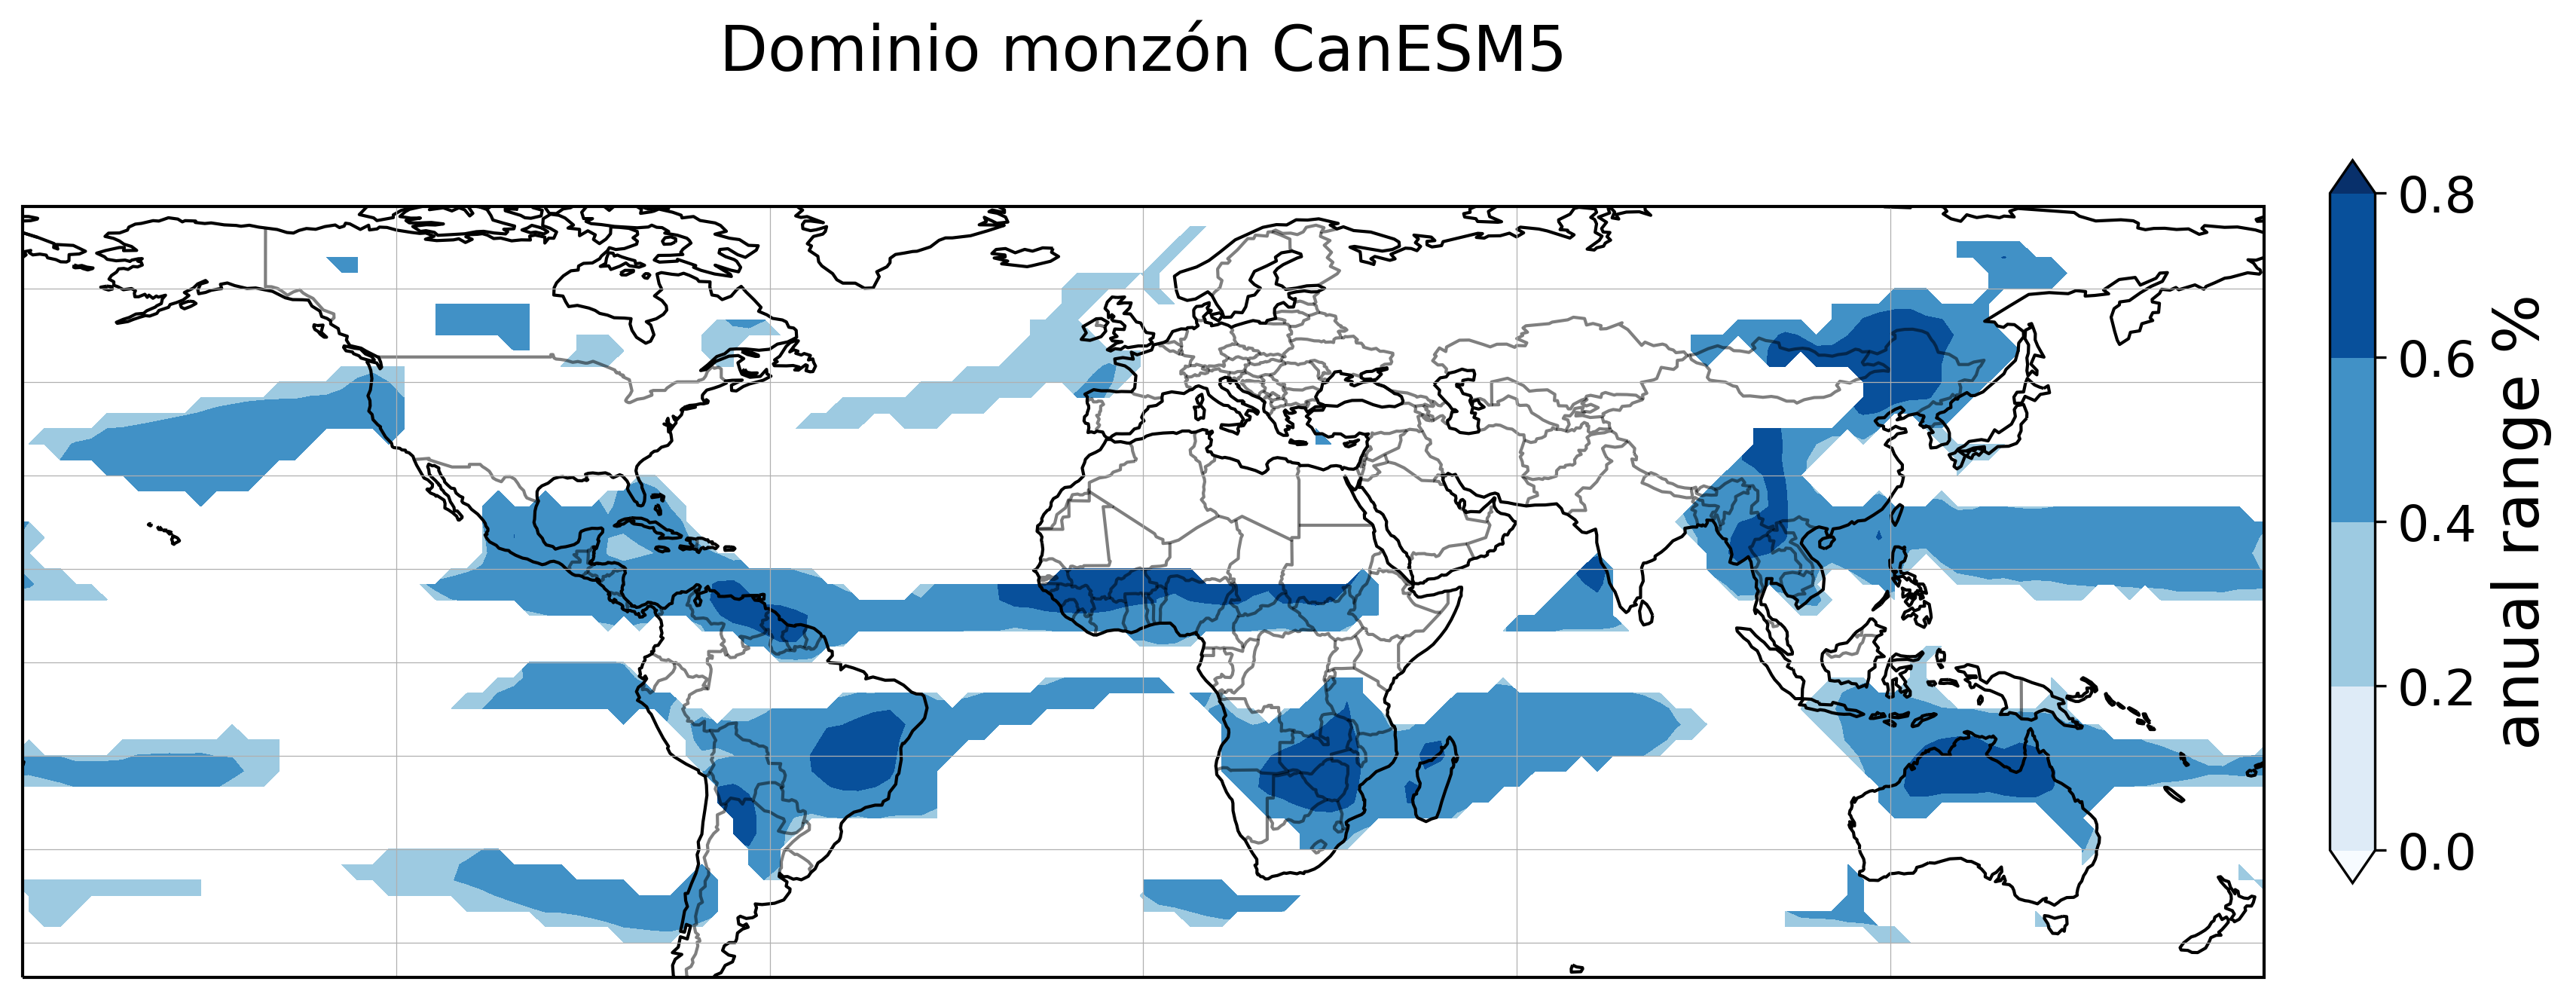

In [6]:
titulo = 'Dominio monzón CanESM5'
mapa(cyclic_range_HS,cyclic_range_HN,titulo)
plt.savefig(path+'dominio_monzon_CanESM5.png',bbox_inches='tight')
plt.clf

In [7]:
monzon_mask_HS = (mon_range_CanESM_HS.where(mon_range_CanESM_HS > 180)/mon_range_CanESM_HS.where(mon_range_CanESM_HS > 180)) * (p_verano_HS.where(p_verano_HS > .35)/p_verano_HS.where(p_verano_HS > .35))
monzon_mask_HN = (mon_range_CanESM_HN.where(mon_range_CanESM_HN > 180)/mon_range_CanESM_HN.where(mon_range_CanESM_HN > 180)) * (p_verano_HN.where(p_verano_HN > .35)/p_verano_HN.where(p_verano_HN > .35))


In [9]:
HS_monson = CanESM5_ens.pr*monzon_mask_HS
HS_hist = HS_monson.sel(time=HS_monson['time.season']=='DJF').mean(dim='time')
cyclic_data_HS, cyclic_lons = add_cyclic_point(HS_hist, coord=lon)
HN_monson = CanESM5_ens.pr*monzon_mask_HN
HN_hist = HN_monson.sel(time=HN_monson['time.season']=='JJA').mean(dim='time')
cyclic_data_HN, cyclic_lons = add_cyclic_point(HN_hist, coord=lon)

/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


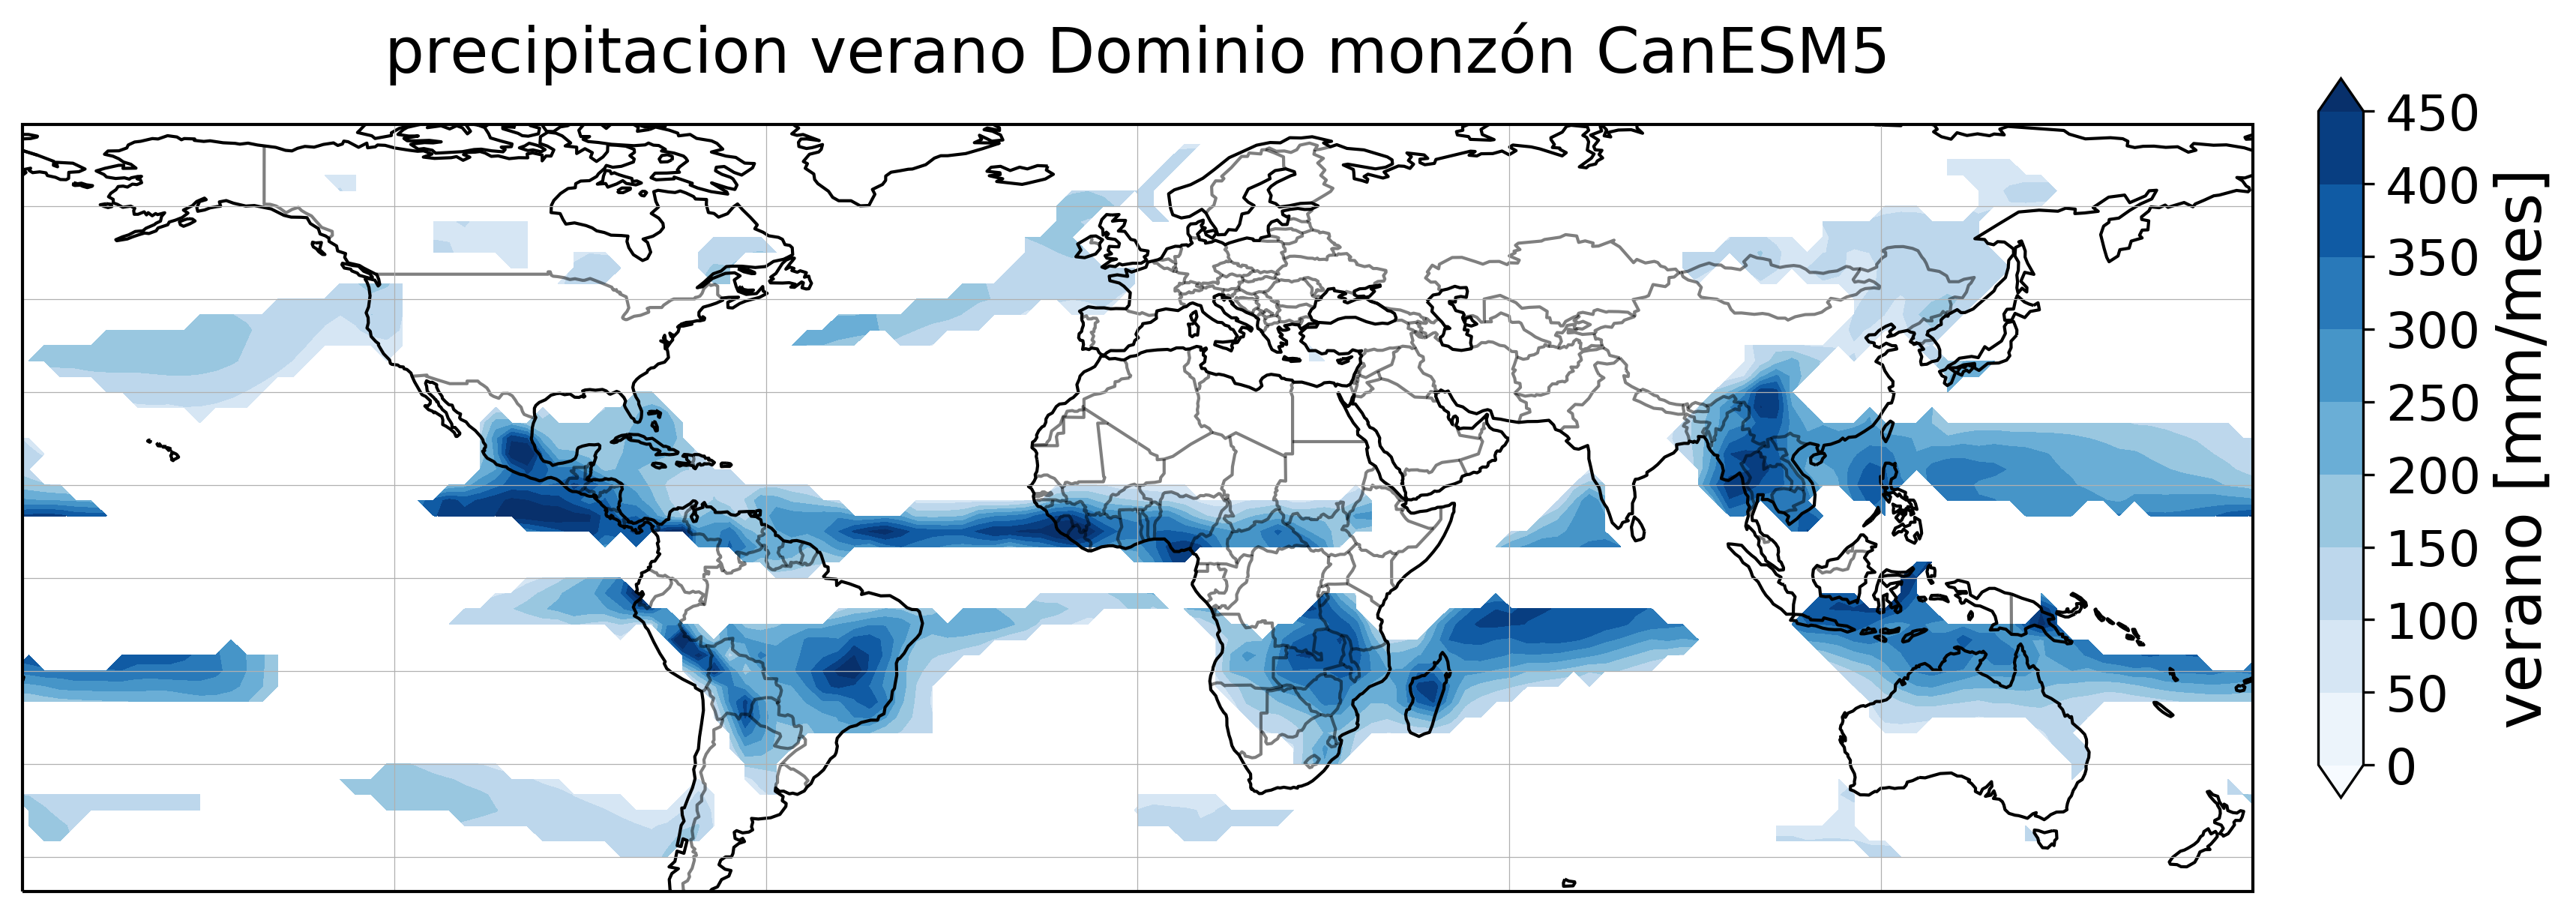

In [10]:
titulo = 'precipitacion verano Dominio monzón CanESM5'
clevels = np.arange(0,500,50)
figura = mapa_colores(cyclic_data_HS,cyclic_data_HN,titulo,clevels)

In [12]:
ua_ens = xr.open_dataset(path2+'/CanESM5/ua850_Amon_CanESM5_historical_r24i1p1f1_2.5.nc')
va_ens = xr.open_dataset(path2+'/CanESM5/va850_Amon_CanESM5_historical_r24i1p1f1_2.5.nc')

In [13]:
ua_ens

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 73, lon: 144, plev: 1, time: 360)
Coordinates:
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * plev       (plev) float64 8.5e+04
  * time       (time) object 1976-01-16 12:00:00 ... 2005-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    ua         (time, plev, lat, lon) float32 ...
Attributes:
    CDI:                         Climate Data Interface version ?? (http://mp...
    history:                     Tue Mar 24 15:35:06 2020: cdo sellevel,85000...
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    institution:                 Canadian Centre for Climate Modelling and An...
    Conventions:                 CF-1.7 CMIP-6.2
    CCCma_model_hash:            f0c7ce6721e37102f4cbfb4d931d60ffc953a1b1
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his24
    YMDH_branch_time_in_child:   1850:01:01:00
    YMDH_branch_time_in_parent:  6351:01:01:00
    activity_id:                 CMIP
    branch_method:               Spin-up documentation
    branch_time_in_child:        0.0
    branch_time_in_parent:       1642865.0
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    creation_date:               2019-04-30T17:34:39Z
    data_specs_version:          01.00.29
    experiment:                  all-forcing simulation of the recent past
    experiment_id:               historical
    external_variables:          areacella
    forcing_index:               1
    frequency:                   mon
    further_info_url:            https://furtherinfo.es-doc.org/CMIP6.CCCma.C...
    grid:                        T63L49 native atmosphere, T63 Linear Gaussia...
    grid_label:                  gn
    initialization_index:        1
    institution_id:              CCCma
    mip_era:                     CMIP6
    nominal_resolution:          500 km
    parent_activity_id:          CMIP
    parent_experiment_id:        piControl
    parent_mip_era:              CMIP6
    parent_source_id:            CanESM5
    parent_time_units:           days since 1850-01-01 0:0:0.0
    parent_variant_label:        r1i1p1f1
    physics_index:               1
    product:                     model-output
    realization_index:           24
    realm:                       atmos
    references:                  Geophysical Model Development Special issue ...
    source_id:                   CanESM5
    source_type:                 AOGCM
    sub_experiment:              none
    sub_experiment_id:           none
    table_id:                    Amon
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/9395d1bf-ab53-47ae-b460-5d792aa...
    variable_id:                 ua
    variant_label:               r24i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    CDO:                         Climate Data Operators version 1.7.2 (http:/...